In [5]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install vaderSentiment
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.3 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [120]:
# Import libraries 

#basic libraries
import pandas as pd 
import numpy as np
import os
#Spacy libraries
import spacy
from spacy.lang.en import English
from spacy.matcher import Matcher, PhraseMatcher
from spacy.tokens import Doc, Span
from spacy.language import Language

#NLTK libraries for sentiment analysis VADER
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Visiualization and ML libraries
import sklearn
import matplotlib


In [121]:
cwd = os.getcwd()  
files = os.listdir(cwd)

print("Files in %r: %s" % (cwd, files))

Files in '/Users/sandrobarreshamers/github/krweb/Python files': ['time line fox.ipynb', 'Time_line_bbc.ipynb', '.ipynb_checkpoints']


In [122]:
time_line = pd.read_csv('/Users/sandrobarreshamers/github/krweb/Query_files/time_line_BBC.csv')
print(time_line)
time_line.columns.values

                          event             datetime  \
0    http://example.com/E_BBC_1  2021-01-06T08:17:00   
1    http://example.com/E_BBC_2  2021-01-06T10:58:00   
2    http://example.com/E_BBC_3  2021-01-06T12:00:00   
3    http://example.com/E_BBC_4  2021-01-06T12:53:00   
4    http://example.com/E_BBC_5  2021-01-06T13:10:00   
5    http://example.com/E_BBC_6  2021-01-06T13:45:00   
6    http://example.com/E_BBC_7  2021-01-06T14:13:00   
7    http://example.com/E_BBC_7  2021-01-06T14:13:00   
8    http://example.com/E_BBC_8  2021-01-06T14:24:00   
9    http://example.com/E_BBC_9  2021-01-06T14:26:00   
10  http://example.com/E_BBC_10  2021-01-06T14:41:00   
11  http://example.com/E_BBC_10  2021-01-06T14:41:00   
12  http://example.com/E_BBC_11  2021-01-06T15:13:00   
13  http://example.com/E_BBC_12  2021-01-06T16:17:00   
14  http://example.com/E_BBC_12  2021-01-06T16:17:00   
15  http://example.com/E_BBC_12  2021-01-06T18:00:00   
16  http://example.com/E_BBC_12  2021-01-06T18:0

array(['event', 'datetime', 'location', 'description'], dtype=object)

In [132]:
# extract the events from the 'event' column and store them in a list
events = time_line['event'].str.split('/').str[-1].str.upper().str.replace('_', ' ').tolist()


time_dict = {}
for t in events:
    time_dict[t] = True

unique_event = [t for t in time_dict.keys()]

unique_event.append('E BBC 13')

# print the events list
print(unique_event)

['E BBC 1', 'E BBC 2', 'E BBC 3', 'E BBC 4', 'E BBC 5', 'E BBC 6', 'E BBC 7', 'E BBC 8', 'E BBC 9', 'E BBC 10', 'E BBC 11', 'E BBC 12', 'E BBC 13']


In [133]:
import datetime

# assuming your original dataset is stored in a pandas dataframe called df
# convert datetime column to datetime type
time_line['datetime'] = pd.to_datetime(time_line['datetime'])

# create empty lists for storing the dates and labels
dates = []
labels = []
times = []
# iterate over the rows of the dataframe
for index, row in time_line.iterrows():
    # append the date to the dates list
    dates.append(row['datetime'].date())
    # append the label to the labels list
    labels.append(row['event'])
    # print the time of the datetime
    times.append(row['datetime'].strftime('%H:%M:%S'))
    #print(row['datetime'].strftime('%H:%M:%S'))
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

time_dict = {}
for t in time:
    time_dict[t] = True

unique_time = [t for t in time_dict.keys()]

print(unique_time)


['08:17:00', '10:58:00', '12:00:00', '12:53:00', '13:10:00', '13:45:00', '14:13:00', '14:24:00', '14:26:00', '14:41:00', '15:13:00', '16:17:00', '18:00:00']


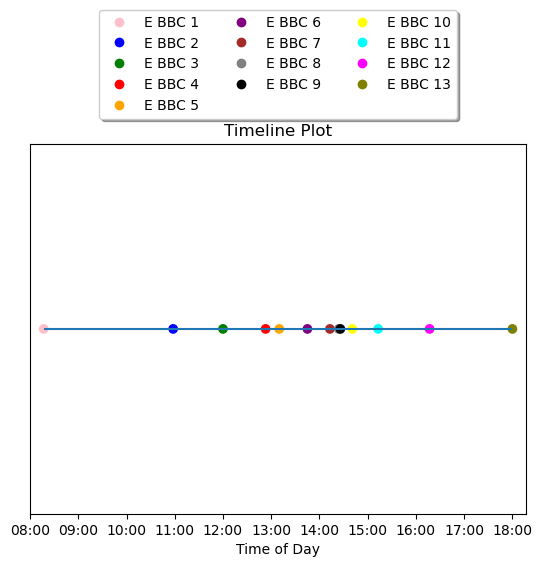

In [138]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

colors = {'E BBC 1': 'pink', 'E BBC 2': 'blue', 'E BBC 3': 'green', 'E BBC 4': 'red', 'E BBC 5': 'orange',
          'E BBC 6': 'purple', 'E BBC 7': 'brown', 'E BBC 8': 'gray', 'E BBC 9': 'black', 'E BBC 10': 'yellow',
          'E BBC 11': 'cyan', 'E BBC 12': 'magenta', 'E BBC 13': 'olive'}


# convert time strings to datetime objects
datetimes = [datetime.strptime(time, '%H:%M:%S') for time in unique_time]

# create figure and axis objects
fig, ax = plt.subplots()

# plot horizontal line for events
ax.hlines(0.5, datetimes[0], datetimes[-1], color='C0')

# plot time points as dots on the line, with colors corresponding to events
colors_list = [colors[event] for event in unique_event]
ax.scatter(datetimes, [0.5] * len(datetimes), color=colors_list)

# create legend
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=event) for event, color in colors.items()]
ax.legend(handles=handles,loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# set x-axis format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(datetime.strptime('08:00:00', '%H:%M:%S'), datetime.strptime('18:17:00', '%H:%M:%S'))
ax.set_xlabel('Time of Day')

# remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# set plot title
ax.set_title('Timeline Plot')

# display plot
plt.show()
